In [1]:
import pandas as pd
import numpy as np
import torch
import tensorflow as tf

In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
from sklearn import model_selection

In [4]:
os.listdir('data')

['sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [6]:
print(test_df.get_values().shape)
train_df.get_values().shape #train have a label 

(28000, 784)


(42000, 785)

In [7]:
train_df.iloc[:, 1:].shape

(42000, 784)

In [8]:
train_np = train_df.iloc[:, :].get_values() / 255
train_np[:, 0] = train_np[:, 0] * 255

In [9]:
type(train_np)

numpy.ndarray

In [10]:
train_np.dtype

dtype('float64')

In [11]:
# plt.imshow(train_np[0].reshape(28, 28))
# plt.show()
# print(train_df.iloc[0, 0])

In [12]:
def get_weight(shape):
    w = tf.truncated_normal(shape=shape, stddev=0.1)
    return w
def get_bias(shape):
    b = tf.truncated_normal(shape=shape, stddev=0.1)
    return b

In [13]:
input_ = tf.placeholder(tf.float32, shape=[None, 28, 28, 1], name='inputs_')
labels = tf.placeholder(tf.float32, shape=[None, 10], name='labels')
w1 = get_weight([5,5,1,32])
b1 = get_bias([32])
w2 = get_weight([5,5,32,64])
b2 = get_bias([64])
# w3 = get_weight([3,3,32,64])
# b3 = get_bias([64])
conv1 = tf.nn.conv2d(input_, w1, strides=[1, 1, 1, 1], padding='SAME') + b1
conv1_relu = tf.nn.relu(conv1)
conv1_relu = tf.nn.max_pool(conv1_relu,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

conv2 = tf.nn.conv2d(conv1_relu, w2, strides=[1, 1, 1, 1], padding='SAME') + b2
conv2_relu = tf.nn.relu(conv2)
conv2_relu = tf.nn.max_pool(conv2_relu,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

# conv3 = tf.nn.conv2d(conv2_relu, w3, strides=[1, 1, 1, 1], padding='SAME') + b3
# conv3_relu = tf.nn.relu(conv3)
print(conv2_relu)
fc1_ = tf.reshape(conv2_relu, [-1, 7 * 7 *64])
print(fc1_)
fc1 = tf.layers.dense(fc1_, 1024, activation=tf.nn.relu)
logits = tf.layers.dense(fc1, 10, activation=None)
print(labels)
print(input_)

Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape:0", shape=(?, 3136), dtype=float32)
Tensor("labels:0", shape=(?, 10), dtype=float32)
Tensor("inputs_:0", shape=(?, 28, 28, 1), dtype=float32)


In [14]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

In [15]:
[train_split, test_split] = model_selection.train_test_split(train_np, train_size=0.7, test_size=0.3)

In [16]:
train_split.shape

(29399, 785)

In [17]:
def get_batch(train_split, batch_size):
    batches = []
    for i in range(train_split.shape[0]):
        if i % batch_size == 0:
            batch_x = train_split[i:i+batch_size, 1:]
            batch_y = train_split[i:i+batch_size, 0]
            print(batch_y)
#             print(batch_y)
#             with tf.Session() as sess:
#                 batch_y = sess.run(tf.one_hot(batch_y, 10))
            batch_y = convert_to_one_hot(np.asarray(batch_y, np.int), 10)
            print(batch_y)
            batches.append([batch_x, batch_y])
    return batches

In [18]:
# convert_to_one_hot(np.array([5,2,3,5,3,2,2,1,2]), 6)

In [19]:
def convert_to_one_hot(y, C):
#     print(np.eye(C))
#     print(y.reshape(-1))
    y = np.asarray(y, np.int)
    return np.eye(C)[y.reshape(-1)]

In [20]:
all_label_one = convert_to_one_hot(train_np[:, 0], 10)
batches = get_batch(train_split, 100)
for x, y in batches:
    print(x.shape)
    print(y.shape)

[ 3.  2.  3.  9.  7.  1.  6.  7.  4.  8.  4.  2.  0.  2.  2.  4.  6.  3.
  7.  7.  2.  9.  2.  7.  4.  5.  4.  9.  1.  0.  7.  5.  0.  5.  3.  8.
  9.  6.  6.  6.  7.  7.  3.  8.  3.  6.  1.  0.  0.  8.  2.  9.  1.  9.
  6.  4.  5.  9.  0.  1.  8.  8.  8.  0.  9.  5.  1.  3.  3.  1.  6.  2.
  1.  1.  5.  1.  1.  3.  5.  7.  9.  8.  5.  5.  3.  0.  1.  8.  2.  0.
  9.  4.  9.  7.  7.  4.  4.  9.  7.  3.]
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0. 

[ 2.  9.  5.  9.  0.  9.  5.  0.  6.  0.  1.  7.  5.  7.  7.  9.  7.  9.
  3.  4.  9.  8.  6.  2.  7.  4.  6.  4.  3.  8.  8.  1.  9.  4.  9.  2.
  7.  5.  5.  0.  6.  0.  9.  4.  3.  5.  3.  5.  8.  2.  8.  1.  5.  1.
  2.  0.  7.  6.  6.  8.  0.  8.  5.  5.  0.  1.  0.  8.  6.  8.  9.  3.
  9.  5.  9.  8.  1.  0.  2.  9.  7.  7.  4.  3.  1.  7.  1.  1.  7.  2.
  7.  2.  5.  0.  4.  7.  5.  3.  1.  0.]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. 

[ 0.  8.  6.  3.  0.  8.  4.  6.  7.  2.  9.  1.  1.  4.  5.  1.  4.  6.
  7.  6.  7.  0.  6.  9.  2.  9.  4.  1.  7.  0.  9.  3.  6.  5.  7.  2.
  7.  7.  5.  7.  6.  6.  0.  8.  8.  5.  1.  9.  6.  8.  7.  6.  6.  1.
  6.  2.  0.  7.  9.  7.  3.  7.  2.  2.  2.  2.  8.  6.  5.  9.  4.  9.
  2.  2.  8.  2.  9.  0.  5.  2.  1.  6.  5.  6.  9.  2.  9.  9.  2.  2.
  6.  9.  3.  3.  1.  0.  0.  2.  1.  2.]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. 

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  

 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
[ 6.  8.  7.  4.  5.  1.  7.  6.  0.  2.  1.  8.  5.  2.  4.  2.  3.  4.
  8.  8.  0.  4.  1.  8.  4.  0.  0.  2.  0.  9.  1.  5.  3.  5.  7.  1.
  2.  3.  1.  6.  4.  7.  6.  0.  2.  9.  8.  4.  6.  5.  1.  2.  0.  5.
  2.  3.  3.  1.  1.  4.  7.  2.  1.  7.  8.  8.  5.  0.  8.  7.  1.  1.
  8.  5.  2.  3.  4.  1.  1.  4.  8.  0.  0.  9.  3.  1.  6.  9.  2.  1.
  4.  7.  5.  1.  0.  0.  2.  9.  5.  2.]
[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.

In [21]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(logits, 1), tf.arg_max(labels, 1)), dtype=tf.float32))
epochs = 2
with tf.Session() as sess:
#     plt.ion()
    sess.run(tf.global_variables_initializer())
    losses = []
    for epoch in range(epochs):
        for batch_x, batch_y in batches:
            batch_x = np.asarray(batch_x, np.float32)
            batch_x = batch_x.reshape(-1,28,28,1)
#             plt.imshow(batch_x[0, :, :, 0])
#             plt.show()
#             print(batch_y[0])
#             print(np.argmax(batch_y[0]))
            _, loss_, logits_= sess.run([optimizer, loss, logits], feed_dict={input_:batch_x, labels:batch_y})
            losses.append(loss)
#             print(logits_)
#             plt.plot(losses)
            print('loss = ' + str(loss_))
#             all_label_one = sess.run(tf.one_hot(train_np[:, 0], 10))
        acc = sess.run(accuracy,feed_dict={input_:train_np[:, 1:].reshape(-1,28,28,1), labels:all_label_one})
        print(acc)
#     plt.ioff()

Instructions for updating:
Use `argmax` instead
loss = 2.33668
loss = 2.35768
loss = 2.30453
loss = 2.38234
loss = 2.40157
loss = 2.3761
loss = 2.32516
loss = 2.29107
loss = 2.27066
loss = 2.33504
loss = 2.33254
loss = 2.31174
loss = 2.26895
loss = 2.30848
loss = 2.30478
loss = 2.38308
loss = 2.17663
loss = 2.20147
loss = 2.304
loss = 2.20103
loss = 2.25134
loss = 2.22087
loss = 2.1112
loss = 2.18909
loss = 2.24136
loss = 2.25755
loss = 2.19624
loss = 2.17842
loss = 2.23253
loss = 2.21907
loss = 2.1651
loss = 2.22056
loss = 2.35012
loss = 2.18384
loss = 2.1362
loss = 2.21704
loss = 2.22927
loss = 2.17646
loss = 2.16855
loss = 2.0226
loss = 2.17822
loss = 2.12233
loss = 2.22913
loss = 2.12992
loss = 2.01486
loss = 2.07727
loss = 2.13517
loss = 2.18425
loss = 2.16788
loss = 2.11034
loss = 2.1998
loss = 2.1652
loss = 2.12997
loss = 2.08618
loss = 2.06486
loss = 2.07605
loss = 2.01517
loss = 2.12083
loss = 2.00499
loss = 1.98226
loss = 2.05011
loss = 1.89273
loss = 2.04637
loss = 2.02732
l

KeyboardInterrupt: 

In [ ]:
c = np.random.rand(9)
data = tf.constant(c.reshape(3,3))
print(c.reshape(3,3))
with tf.Session() as sess:
    print(sess.run(tf.argmax(data)))
    print(type(sess.run(tf.argmax(data))))
    print(sess.run(tf.arg_max(data, 0)))
    print(sess.run(tf.equal(3,3)))

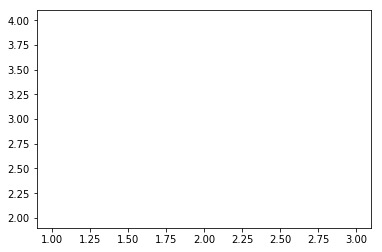

In [24]:
plt.plot(1,2,3,4)
plt.show()